In [1]:
from comparison import tests, ORDER
import pandas as pd
import numpy as np

In [2]:
ORDER

['number_of_nodes', 'features', 'normalize']

In [3]:
arguments_list = []

for number_of_nodes in [7, 8, 9]:
    for features in [("moltop",), ("moltop","ltp"), ("moltop", "ldp"), ("moltop", "ltp", "ldp")]:
        features = np.array(features)
        for normalize in [True, False]:
            arguments_list.append(dict(number_of_nodes=number_of_nodes,
                                        features=features,
                                        normalize=normalize))

In [4]:
tests(arguments_list)

test with {'number_of_nodes': 7, 'features': ['ari', 'edge_betweenness', 'scan'], 'normalize': True} parameters existed, skipped
test with {'number_of_nodes': 7, 'features': ['ari', 'edge_betweenness', 'scan'], 'normalize': False} parameters existed, skipped
test with {'number_of_nodes': 7, 'features': ['ari', 'edge_betweenness', 'jaccard_index', 'lds', 'scan'], 'normalize': True} parameters existed, skipped
test with {'number_of_nodes': 7, 'features': ['ari', 'edge_betweenness', 'jaccard_index', 'lds', 'scan'], 'normalize': False} parameters existed, skipped
test with {'number_of_nodes': 7, 'features': ['ari', 'edge_betweenness', 'ldp_degree', 'ldp_max', 'ldp_mean', 'ldp_min', 'ldp_std', 'scan'], 'normalize': True} parameters existed, skipped
test with {'number_of_nodes': 7, 'features': ['ari', 'edge_betweenness', 'ldp_degree', 'ldp_max', 'ldp_mean', 'ldp_min', 'ldp_std', 'scan'], 'normalize': False} parameters existed, skipped
test with {'number_of_nodes': 7, 'features': ['ari', 'edg

In [5]:
test_data = pd.read_parquet('processed_datasets/table.parquet')
test_data['count'] = test_data['result'].apply(len)

In [6]:
test_data

,number_of_nodes,features,normalize,result,count
0,7,[moltop],True,[-1],1
0,7,[moltop],False,[-1],1
0,7,"[moltop, ltp]",True,[-1],1
0,7,"[moltop, ltp]",False,[-1],1
0,7,"[moltop, ldp]",True,[-1],1
0,7,"[moltop, ldp]",False,[-1],1
0,7,"[moltop, ltp, ldp]",True,[-1],1
0,7,"[moltop, ltp, ldp]",False,[-1],1
0,8,[moltop],True,"[144, 558, 537, 562]",4
0,8,[moltop],False,"[144, 558, 537, 562]",4


In [7]:
import seaborn as sns
test_data['features'] = test_data['features'].astype('string').astype('category')
test_data.columns

Index(['number_of_nodes', 'features', 'normalize', 'result', 'count'], dtype='object')

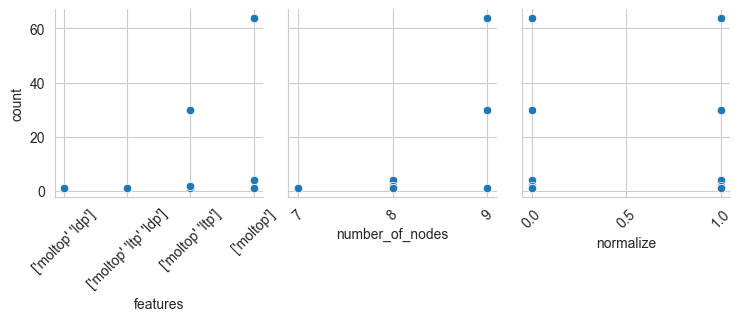

In [11]:

g = sns.pairplot(test_data.drop(columns=['result']), 
             y_vars=['count'],
             x_vars=['features', 'number_of_nodes', 'normalize'],
             )

for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)